# Wikidata linked to Github data

This notebook explores a sample of individuals from academia who are found in Wikidata and who are linked to Github data. 

Table of contents 
- Exploration by country
    - Number of users
    - Number of repositories
- Exploration by gender 
    - Number of repositories 
    - Number of commits 
    - Number of additions 
    - Contributions to repository owners 
    - Collaborations 
    - Degree, number of connections

# Exploration by country

## Number of users and number of repositories by country, top 10 results

Note: not all users have the country reported. The country was pulled based on the Github metadata. ~ 14.18% of users is missing country. "Missing" is included as a category.

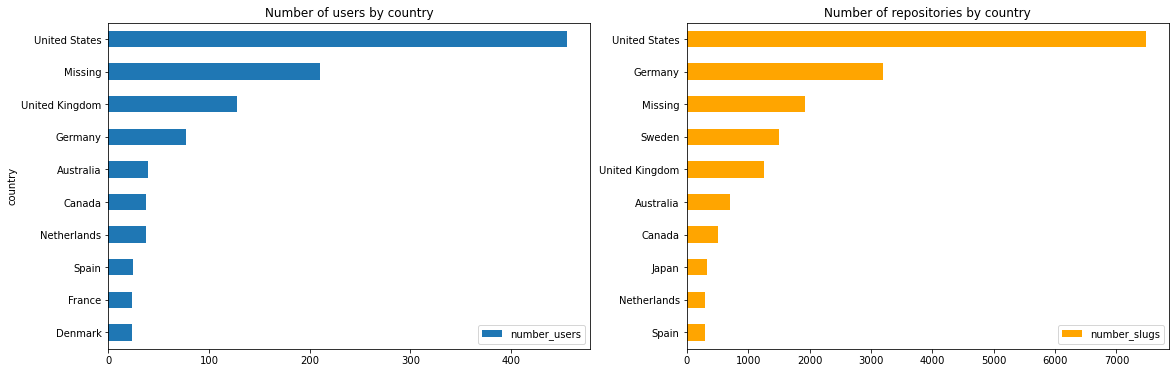

In [79]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(19,6))
number_users.plot(x='country', y='number_users', kind='barh', ax=ax0, title = 'Number of users by country').invert_yaxis()
number_slugs.plot(x='country', y='number_slugs', color='orange', kind='barh',ax=ax1, title = 'Number of repositories by country').invert_yaxis()
plt.ylabel('')
plt.show()

Note on the number of repositories: This is based on the table where each user has the corresponding total number of slugs, and the counts are taken by country based on that number. There could be overlaps between these repositories (i.e. the same repository counted more than one time), because here we do not take into account if the users contributed to the same repository. It is based on the number of repositories by user. 

Summary: Based on the tables above, we can see that the top countries by number of users in the Wikidata sample is United States, UK, and Germany, but by the number of repositories (i.e. productivity) the top three countries are slightly different: United States, Germany, and Sweden, and Japan appears in the top 10, which is interesting to see. We plan to look further into different measures of productivity of users by country.

# Exploration by gender

We created a gender variable in the Wikidata sample based on the following logic: 
- if gender is *not missing* in the Wikidata, we use that as the basis/true data (as the Wikidata is self-reported/crowdsourced). 
- where gender is *missing* in the Wikidata, we impute it with the `gender-guesser` Python package: https://pypi.org/project/gender-guesser/
    - this package has the following categories: 
        - `male`
        - `female`
        - `mostly_male`
        - `mostly_female`
        - `unknown`
        - `andy` (androgynous)
        - `non-binary`

We included `mostly_male` and `mostly_female` in the respective `male` and `female` categories; `andy` and `non-binary` are included in the `other` category, `unknown` is the category on its own.

Breakdown by the finalized gender categories:

In [73]:
user_gender

,gender_updated,login,total,percentage
1,male,1086,1481,73.33
0,female,186,1481,12.56
3,unknown,170,1481,11.48
2,other,39,1481,2.63


In this sample 12.56% is categorized is female. According to this source: "In a 2013 survey of the more than 2000 open source developers who indicated a gender, only 11.2% were women (Arjona-Reina, Robles & Dueas, 2014)." 
Article source that cited this survey: https://peerj.com/articles/cs-111/

We wanted to see the descriptive statistics and exploratory visualizations by number of repositories, commits, and additions (lines in the code added) by gender.

According to the same article source as above, men tend to contribute to more repositories than women (broad, more extensive contributions), but perhaps women tend to focus their efforts more on fewer repositories, as evidenced by a higher activity on those (narrow, more intensive contributions).
- In this article, the authors found that women tend to have higher acceptance rates of their pull requests, and they had the following hypothesis: "One possible explanation for women’s higher acceptance rates is that they are focusing their efforts more than men; perhaps their success is explained by doing pull requests on few projects, whereas men tend to do pull requests on more projects. First, the data do suggest that women tend to contribute to fewer projects than men. 
Source: https://peerj.com/articles/cs-111/#utable-1

Below we are doing the exploration of this topic in the number of repositories, commits, and line additions by gender:

Note on the data pre-processing: one user didn't have information on number of slugs, commits, additions. Total population for the analysis below: 1,480 individuals. Two users had duplicate entries, as the information on the full name was slightly different - duplicate entries were removed, as it didn't influence the assignment of gender for those users.

## Number of repositories by gender

Descriptive statistics for number of repositories

The average number of repositories is higher for males than females, but the overall distribution is long-tailed, not normal (please see the visualizations below). We are currently investigating what would be the optimal way to compare the differences, taking into account the long-tailed distributions.

In [212]:
user_node.groupby('gender_updated')['number_slugs'].describe()

,count,mean,std,min,25%,50%,75%,max
gender_updated,,,,,,,,
female,185.0,10.470270,37.252523,1.0,1.0,4.0,9.0,483.0
male,1086.0,17.151934,76.399580,1.0,3.0,6.0,15.0,2020.0
other,39.0,6.025641,8.044243,1.0,1.0,3.0,6.0,42.0
unknown,170.0,7.970588,11.688474,1.0,2.0,4.0,8.0,73.0


Boxplot for number of repositories

<AxesSubplot:xlabel='gender_updated', ylabel='number_slugs'>

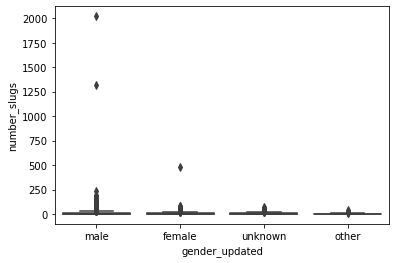

In [217]:
plt.ticklabel_format(style='plain', axis='x')
seaborn.boxplot(x='gender_updated', y='number_slugs', 
            data=user_node)

Density plot for number of repositories

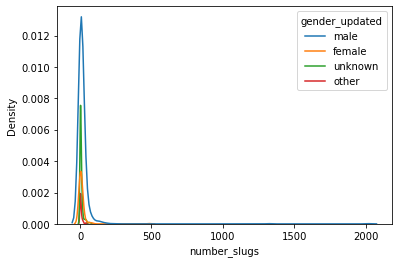

In [222]:
seaborn.kdeplot(x='number_slugs',data=user_node,hue='gender_updated')
plt.show()

Logged histogram for number of repositories

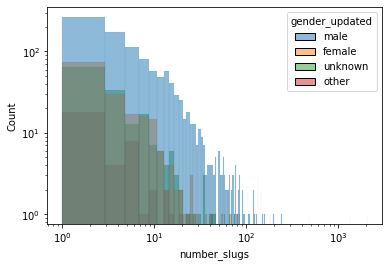

In [218]:
ax = seaborn.histplot(x='number_slugs',data=user_node,hue='gender_updated')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

## Number of commits by gender

Descriptive statistics for number of commits

The average number of commmits is higher for males than females, however, as mentioned above, the overall distribution is also long-tailed, not normal (please see the visualizations below). We are currently investigating what would be the optimal way to compare the differences, taking into account the long-tailed distributions.

We would also like to look into whether women tend to commit more intensively to the same repositories, while men commit more extensively, to different repositories.

In [223]:
user_node.groupby('gender_updated')['number_commits'].describe()

,count,mean,std,min,25%,50%,75%,max
gender_updated,,,,,,,,
female,185.0,383.994595,1297.765695,1.0,15.00,66.0,291.00,13688.0
male,1086.0,611.187845,1322.171883,1.0,42.00,167.0,551.25,18121.0
other,39.0,285.948718,633.138671,2.0,23.00,55.0,248.50,3411.0
unknown,170.0,310.511765,713.721758,1.0,28.25,87.5,255.50,4967.0


Boxplot for number of commits

<AxesSubplot:xlabel='gender_updated', ylabel='number_commits'>

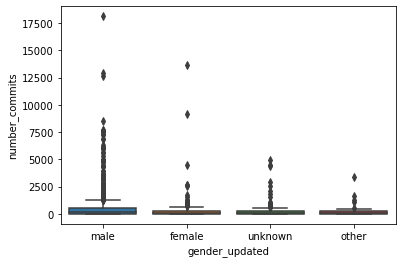

In [224]:
plt.ticklabel_format(style='plain', axis='x')
seaborn.boxplot(x='gender_updated', y='number_commits', 
            data=user_node)

Logged histogram for number of commits

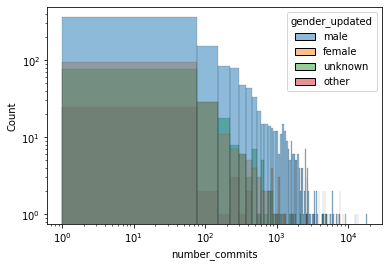

In [225]:
ax = seaborn.histplot(x='number_commits',data=user_node,hue='gender_updated')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

Density plot for number of commits

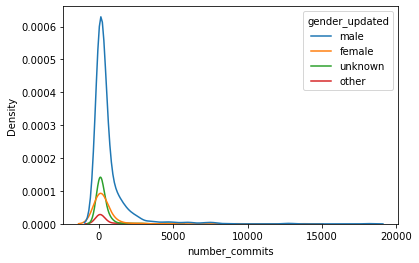

In [226]:
seaborn.kdeplot(x='number_commits',data=user_node,hue='gender_updated')
plt.show()

## Number of additions by gender

The average number of lines added is higher for females, but, as mentioned above, the distribution is not normal; outliers may be pulling the mean higher.

In [227]:
user_node.groupby('gender_updated')['number_additions'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
gender_updated,,,,,,,,
female,185.0,2026532.3,12308593.4,0.0,1445.0,29491.0,271713.0,149080533.0
male,1086.0,1422974.8,5328611.7,0.0,13099.5,122162.5,721692.2,97394457.0
other,39.0,672802.3,2295155.6,125.0,7319.0,27019.0,282055.0,13876413.0
unknown,170.0,1171781.1,4047907.6,0.0,7936.8,67547.0,387783.5,41747156.0


Boxplot for number of additions

<AxesSubplot:xlabel='gender_updated', ylabel='number_additions'>

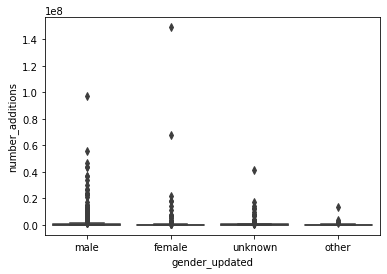

In [228]:
plt.ticklabel_format(style='plain', axis='x')
seaborn.boxplot(x='gender_updated', y='number_additions', 
            data=user_node)

Logged histogram for number of additions

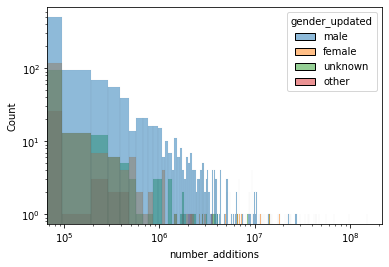

In [229]:
ax = seaborn.histplot(x='number_additions',data=user_node,hue='gender_updated')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

Density plot for number of additions

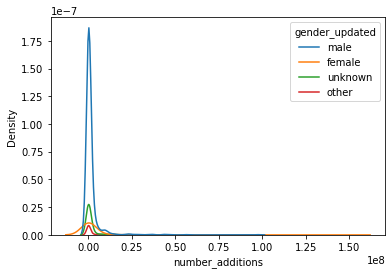

In [230]:
seaborn.kdeplot(x='number_additions',data=user_node,hue='gender_updated')
plt.show()

Summary: We would like to investigate further whether women tend to contribute more intensively to fewer repositories, while men tend to contribute more expansively, to more repositories.

From the same article source above, one interesting note - when the authors tried to explain why they find that women tend to have higher acceptance rates of pull requests, they suggested this:
- "Another theory is that women in open source are, on average, more competent than men. In Lemkau’s review of the psychology and sociology literature, she found that women in male-dominated occupations tend to be highly competent (Lemkau, 1979). (...) Assuming this final theory is the best one, why might it be that women are more competent, on average? One explanation is survivorship bias: as women continue their formal and informal education in computer science, the less competent ones may change fields or otherwise drop out. Then, only more competent women remain by the time they begin to contribute to open source. In contrast, less competent men may continue. While women do switch away from STEM majors at a higher rate than men, they also have a lower drop out rate then men (Chen, 2013), so the difference between attrition rates of women and men in college appears small. Another explanation is self-selection bias: the average woman in open source may be better prepared than the average man, which is supported by the finding that women in open source are more likely to hold Master’s and PhD degrees (Arjona-Reina, Robles & Dueas, 2014). "

Source article: https://peerj.com/articles/cs-111/#utable-1

## Contributions to repository owners by gender (in progress)

We look into the gender of contributors and the gender of the owners of the repositories that they contribute to.

We imputed the gender of owners based on the methodology described above (first name). We got those names from Github API, based on the user name. Note: in many cases, the owner's name would be a general organization name, not a personal name, which would be classified as "unknown", that's why the number of "unknown" is quite high.

In [85]:
# Column 0 is the number of pairs in the underlying user-owner table: 
# e.g. number of "female user-female owner" pairs, number of "female user-male owner" pairs, etc.
login_owner.groupby(['login_gender','owner_gender']).size().reset_index()

,login_gender,owner_gender,0
0,female,female,123
1,female,male,181
2,female,other,7
3,female,unknown,520
4,male,female,313
5,male,male,2146
6,male,other,64
7,male,unknown,4212
8,other,female,4
9,other,male,10


Based on the table above, females are more likely to contribute to a repository with a female owner (40.46%) than males (12.71%).

In [114]:
# Percentage of female contributions to repositories with female owners
# Denominator is the total female contributions to female+male owners
(123/(123+181))*100

40.46052631578947

In [76]:
# Percentage of male contributions to repositories with female owners
# Denominator is the total male contributions to female+male owners
(313/(313+2146))*100

12.713241267262386

Males are more likely to contribute to a repository with a male owner (87.28%) than females (59.53%).

In [77]:
# Percentage of male contributions to repositories with male owners
# Denominator is the total male contributions to female+male owners
(2146/(313+2146))*100

87.28675873273761

In [79]:
# Percentage of female contributions to repositories with male owners
# Denominator is the total female contributions to female+male owners
(181/(123+181))*100

59.539473684210535

## Collaborations by gender (in progress)

We look into the collaborations between users - for each unique user, we found their collaborators, if any, and their gender. We use the weighted number of connections - e.g. if user 1 collaborated with user 2 on six different repositories, the weight will be 6. Then the weight is summed by pairs: "female source-female target", "female source-male target", etc.

In [349]:
user_edge_gender_updated.groupby(['gender_updated_source','gender_updated_target'])['weight'].sum().reset_index()

,gender_updated_source,gender_updated_target,weight
0,female,female,35
1,female,male,230
2,female,other,5
3,female,unknown,21
4,male,female,252
5,male,male,3542
6,male,other,14
7,male,unknown,199
8,unknown,female,22
9,unknown,male,198


Based on the table above, females are more likely to collaborate on the same repository with females (13%) than the likelihood of males collaborating with females on the same repository (6%).

In [80]:
# Percentage of females collaborating on the same repository with females
# Denominator is the total number of female+male connections
(35/(35+230))*100

13.20754716981132

In [82]:
# Percentage of males collaborating on the same repository with females
# Denominator is the total number of female+male connections
(252/(252+3542))*100

6.642066420664207

Males are more likely to collaborate on the same repository with males (93%) than the likelihood of females collaborating with males on the same repository (86%).

In [83]:
# Percentage of males collaborating on the same repository with males
# Denominator is the total number of female+male connections
(3542/(252+3542))*100

93.35793357933579

In [81]:
# Percentage of females collaborating on the same repository with males
# Denominator is the total number of female+male connections
(230/(35+230))*100

86.79245283018868

## Degree, number of connections, by gender (in progress)

Based on the number of connections in the network, we wondered if women would have 0 connections more often than men (women would be less central in the network).

This table shows the breakdown of individuals by gender with 0 connections in the network under the "login" column:

In [305]:
# 'Login' column - number of individuals with 0 connections
# 'Total' column - total number of individuals
degree_gender

,gender_updated,login,total,percentage
0,male,735,1086,67.68
1,unknown,144,170,84.71
2,female,129,185,69.73
3,other,35,39,89.74


Based on the table, we can see that slightly higher percentage of women (69.73%) has 0 connections than men (67.68%).

We plan to use weighted degree to repeat the same analysis.

Descriptive statistics for degree by gender:

In [306]:
node_degree.groupby('gender_updated')['Degree'].describe()

,count,mean,std,min,25%,50%,75%,max
gender_updated,,,,,,,,
female,185.0,1.902703,6.641540,0.0,0.0,0.0,1.0,51.0
male,1086.0,2.599448,8.271252,0.0,0.0,0.0,1.0,81.0
other,39.0,0.512821,2.722922,0.0,0.0,0.0,0.0,17.0
unknown,170.0,1.570588,6.474188,0.0,0.0,0.0,0.0,43.0


Boxplot for degree

<AxesSubplot:xlabel='gender_updated', ylabel='Degree'>

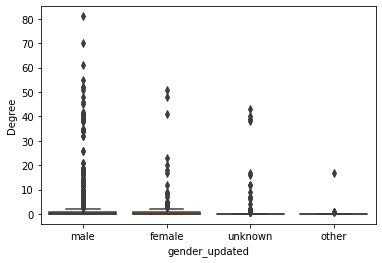

In [307]:
plt.ticklabel_format(style='plain', axis='x')
seaborn.boxplot(x='gender_updated', y='Degree', 
            data=node_degree)

Density plot for degree

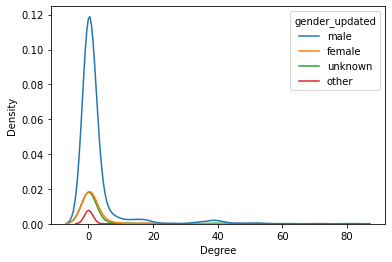

In [309]:
seaborn.kdeplot(x='Degree',data=node_degree,hue='gender_updated')
plt.show()

These results are presented based on the Wikidata academic sample.